<a href="https://colab.research.google.com/github/SanjayBista1010/my-first-repo/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [16]:
df.dropna(inplace=True)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [17]:
df['furnishingstatus'].value_counts()

,count
furnishingstatus,
semi-furnished,227
unfurnished,178
furnished,140


In [18]:
main_road = {'yes' :1, 'no':0}
columns = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[columns] = df[columns].replace(main_road)
df

/tmp/ipython-input-18-2348117887.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[columns] = df[columns].replace(main_road)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [19]:
q3= df['price'].quantile(0.75)
print(q3)

df = df[df['price'] <= q3]
df

5740000.0


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
136,5740000,5400,4,2,2,1,0,0,0,1,2,0,unfurnished
137,5740000,4640,4,1,2,1,0,0,0,0,1,0,semi-furnished
138,5740000,5000,3,1,3,1,0,0,0,1,0,0,semi-furnished
139,5740000,6360,3,1,1,1,1,1,0,1,2,1,furnished
140,5740000,5800,3,2,4,1,0,0,0,1,0,0,unfurnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [20]:
furnish = {'furnished' :2,'semi-furnished':1,'unfurnished':0}
df['furnishingstatus'] = df['furnishingstatus'].replace(furnish)
encoded_df= df
encoded_df

/tmp/ipython-input-20-539633351.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['furnishingstatus'] = df['furnishingstatus'].replace(furnish)
/tmp/ipython-input-20-539633351.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['furnishingstatus'] = df['furnishingstatus'].replace(furnish)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
136,5740000,5400,4,2,2,1,0,0,0,1,2,0,0
137,5740000,4640,4,1,2,1,0,0,0,0,1,0,1
138,5740000,5000,3,1,3,1,0,0,0,1,0,0,1
139,5740000,6360,3,1,1,1,1,1,0,1,2,1,2
140,5740000,5800,3,2,4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [21]:
y = encoded_df['price']
y

,price
136,5740000
137,5740000
138,5740000
139,5740000
140,5740000
...,...
540,1820000
541,1767150
542,1750000
543,1750000


In [22]:
x = encoded_df.drop('price', axis=1)
x

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
136,5400,4,2,2,1,0,0,0,1,2,0,0
137,4640,4,1,2,1,0,0,0,0,1,0,1
138,5000,3,1,3,1,0,0,0,1,0,0,1
139,6360,3,1,1,1,1,1,0,1,2,1,2
140,5800,3,2,4,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [23]:
from sklearn.model_selection import train_test_split

np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((286, 12), (123, 12), (286,), (123,))

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

x_train_scaled, x_test_scaled

(array([[-1.28262272,  0.21442251, -0.41302824, ..., -0.67114314,
          2.28416096,  1.55749617],
        [-0.55925411, -1.17932379, -0.41302824, ..., -0.67114314,
         -0.43779752, -1.13400778],
        [ 0.72198918, -1.17932379, -0.41302824, ...,  0.55928595,
         -0.43779752,  1.55749617],
        ...,
        [ 0.41235538, -1.17932379, -0.41302824, ...,  0.55928595,
          2.28416096, -1.13400778],
        [-0.80482574, -1.17932379, -0.41302824, ..., -0.67114314,
         -0.43779752, -1.13400778],
        [-0.02006423,  1.6081688 ,  2.10029252, ..., -0.67114314,
         -0.43779752,  0.21174419]]),
 array([[-0.26777126,  0.21442251, -0.41302824, ...,  0.55928595,
         -0.43779752,  0.21174419],
        [-0.55925411,  1.6081688 , -0.41302824, ...,  1.78971503,
         -0.43779752,  1.55749617],
        [-0.42579127, -1.17932379, -0.41302824, ..., -0.67114314,
         -0.43779752,  0.21174419],
        ...,
        [-0.48451492,  1.6081688 , -0.41302824, ..., -

<Axes: >

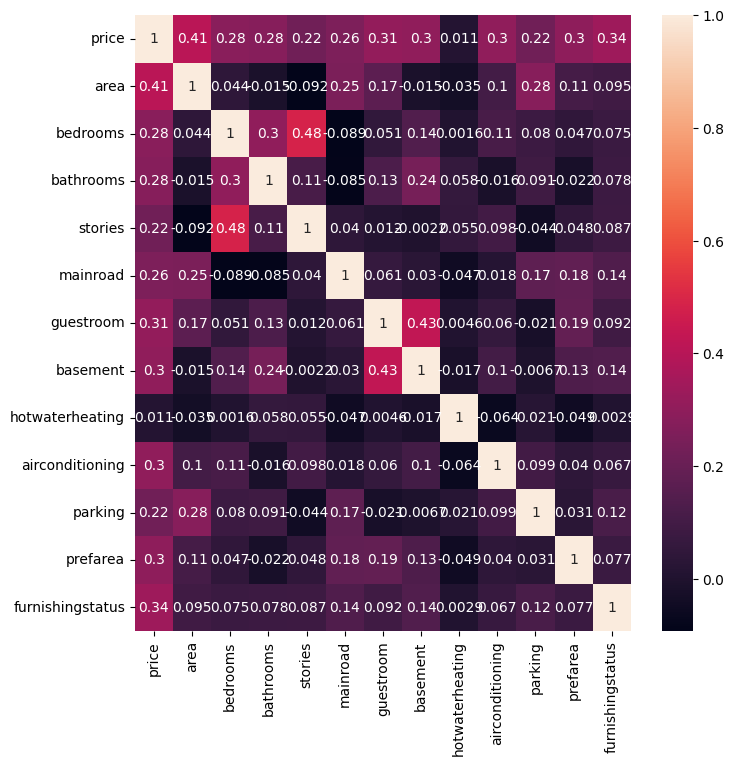

In [25]:
import seaborn as sns
corr = encoded_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=corr, annot =True)

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

model = LinearRegression()
model.fit(x_train_scaled, y_train)

LinearRegression()

In [27]:
beta_0 = model.intercept_
b1, b2, b3,b4,b5,b6,b7,b8,b9,b10,b11,b12 = model.coef_

print("Intercept (β0):", beta_0)
print("Coefficients:", (b1, b2, b3,b4,b5,b6,b7,b8,b9,b10,b11,b12))

Intercept (β0): 3863645.104895105
Coefficients: (np.float64(274656.96376654564), np.float64(128920.88922059804), np.float64(154229.2967816608), np.float64(71601.89477928728), np.float64(80433.50004077384), np.float64(102156.18237989914), np.float64(141265.3910915232), np.float64(15465.608600813826), np.float64(190896.99809140555), np.float64(63177.146709792), np.float64(181805.69663535504), np.float64(185316.85045796042))


In [28]:
y_pred = model.predict(x_test_scaled)
comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
print(comparison)

      Actual     Predicted
0    4165000  3.905495e+06
1    4340000  4.028951e+06
2    4445000  3.802115e+06
3    4690000  4.038182e+06
4    4900000  3.484895e+06
..       ...           ...
118  3290000  2.976313e+06
119  2233000  4.104422e+06
120  3234000  3.698522e+06
121  4970000  4.643112e+06
122  4830000  3.409989e+06

[123 rows x 2 columns]


In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rtwo = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2Score: {rtwo}")

MAE: 561582.7123895974
MSE: 511173717745.7314
RMSE: 714964.1373843385
R2Score: 0.5362741910192017


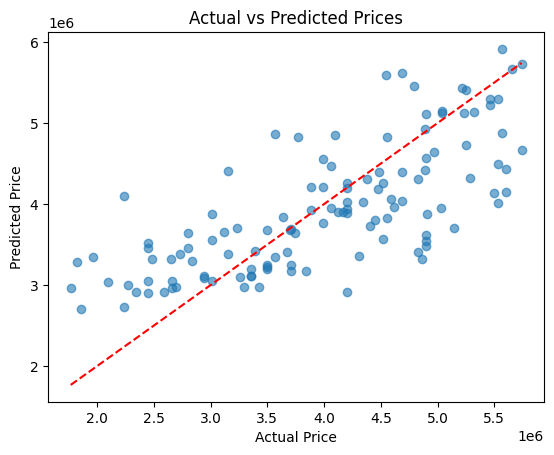

In [30]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()

<Axes: ylabel='price'>

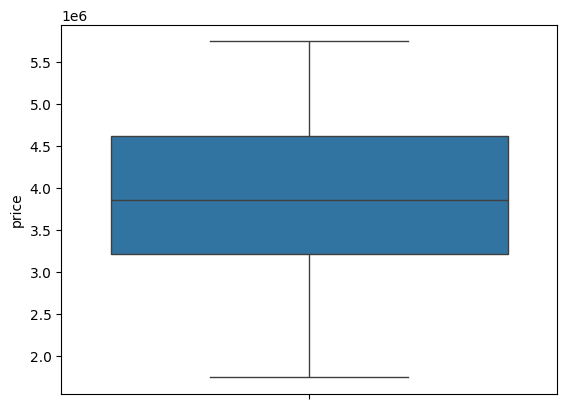

In [31]:
import seaborn as sns
sns.boxplot(df['price'])

In [32]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

knn_model = KNeighborsRegressor(n_neighbors=99)
knn_model.fit(x_train_scaled, y_train)

y_knn_pred = knn_model.predict(x_test_scaled)

knn_mae = mean_absolute_error(y_test, y_knn_pred)
knn_rmse = np.sqrt(mean_squared_error(y_test, y_knn_pred))
knn_rtwo = r2_score(y_test, y_pred)

print(f"KNN Regression MAE: {knn_mae}")
print(f"KNN Regression RMSE: {knn_rmse}")
print(f"KNN Regression R2Score: {knn_rtwo}")

comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_knn_pred
})
print(comparison)

KNN Regression MAE: 755145.7666091812
KNN Regression RMSE: 898947.3039278864
KNN Regression R2Score: 0.5362741910192017
      Actual     Predicted
0    4165000  3.713253e+06
1    4340000  3.788768e+06
2    4445000  3.792869e+06
3    4690000  3.630030e+06
4    4900000  3.686242e+06
..       ...           ...
118  3290000  3.265394e+06
119  2233000  3.540515e+06
120  3234000  3.588808e+06
121  4970000  4.041333e+06
122  4830000  3.579828e+06

[123 rows x 2 columns]


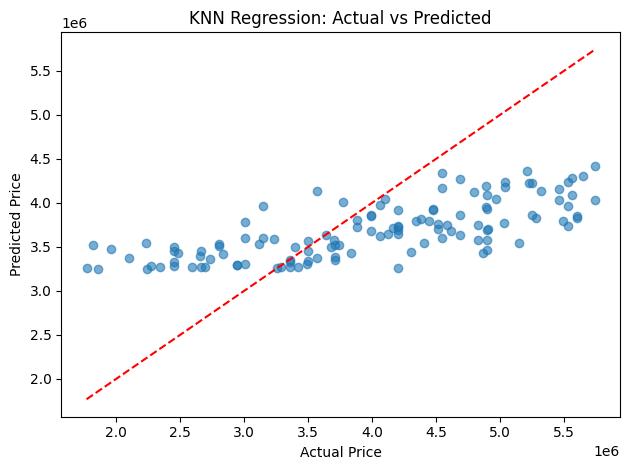

In [33]:
plt.scatter(y_test, y_knn_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("KNN Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()

In [34]:
from sklearn.svm import SVR

svr_model = SVR(kernel='linear', C=1000, epsilon=0.7)
svr_model.fit(x_train_scaled, y_train)

y_svr_pred = svr_model.predict(x_test_scaled)

svr_mae = mean_absolute_error(y_test, y_svr_pred)
svr_rmse = np.sqrt(mean_squared_error(y_test, y_svr_pred))
svr_rtwo = r2_score(y_test,y_svr_pred)

print(f"SVR MAE: {svr_mae}")
print(f"SVR RMSE: {svr_rmse}")
print(f"SVR R two Score: {svr_rtwo}")

comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_svr_pred
})
print(comparison)

SVR MAE: 739672.44401763
SVR RMSE: 887282.7047351258
SVR R two Score: 0.2858050358869272
      Actual     Predicted
0    4165000  3.857003e+06
1    4340000  3.931330e+06
2    4445000  3.840469e+06
3    4690000  3.819231e+06
4    4900000  3.704324e+06
..       ...           ...
118  3290000  3.500447e+06
119  2233000  3.731750e+06
120  3234000  3.748979e+06
121  4970000  4.110900e+06
122  4830000  3.657536e+06

[123 rows x 2 columns]


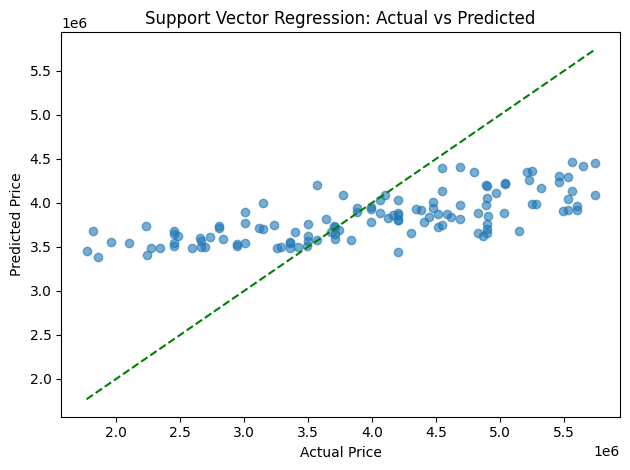

In [35]:
plt.scatter(y_test, y_svr_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'g--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Support Vector Regression: Actual vs Predicted")
plt.tight_layout()
plt.show()